In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [19]:
# from google.colab import drive
# drive.mount('/content/drive')

In [20]:

df = pd.read_csv("/content/drive/MyDrive/heart.csv")

In [21]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## EDA & Data Cleaning and Preprocessing

In [22]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [23]:
df.shape

(918, 12)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [25]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [26]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='HeartDisease'>

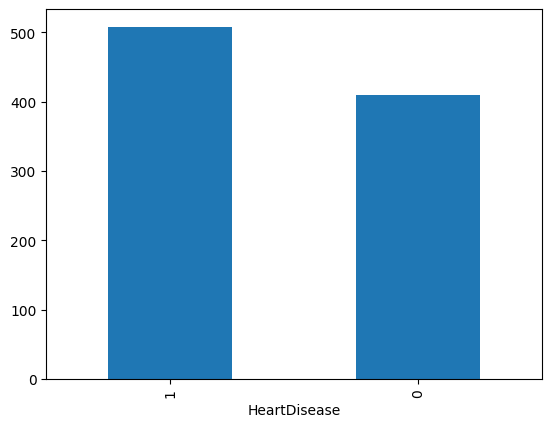

In [27]:
df['HeartDisease'].value_counts().plot(kind = "bar")

In [28]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


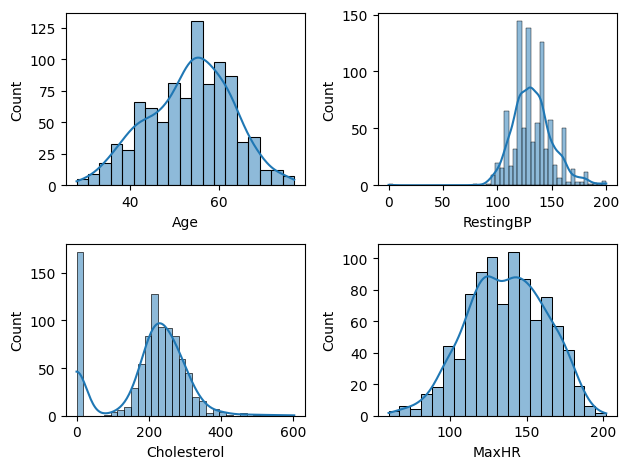

In [29]:
def plotting(var,num):
    plt.subplot(2,2,num)
    sns.histplot(df[var],kde = True)

plotting('Age',1)
plotting('RestingBP',2)
plotting('Cholesterol',3)
plotting('MaxHR',4)


plt.tight_layout()

In [30]:
df['Cholesterol'].value_counts()

,count
Cholesterol,
0,172
254,11
220,10
223,10
204,9
...,...
353,1
278,1
157,1


In [31]:
ch_mean = df.loc[df['Cholesterol'] != 0,'Cholesterol'].mean()

In [32]:
df['Cholesterol'] = df['Cholesterol'].replace(0,ch_mean)
df['Cholesterol'] = df['Cholesterol'].round(2)

In [33]:
resting_bp_mean = df.loc[df['RestingBP'] != 0, 'RestingBP'].mean()

df['RestingBP'] = df['RestingBP'].replace(0, resting_bp_mean)

df['RestingBP'] = df['RestingBP'].round(2)

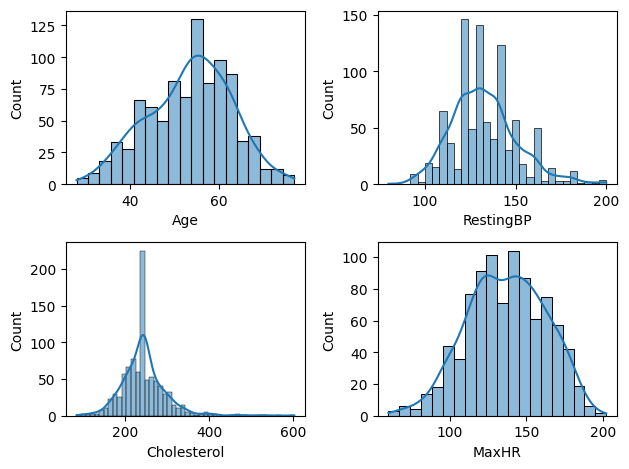

In [34]:
plotting('Age',1)
plotting('RestingBP',2)
plotting('Cholesterol',3)
plotting('MaxHR',4)


plt.tight_layout()

## Categorical Variables Analysis with Heart Disease (Target)

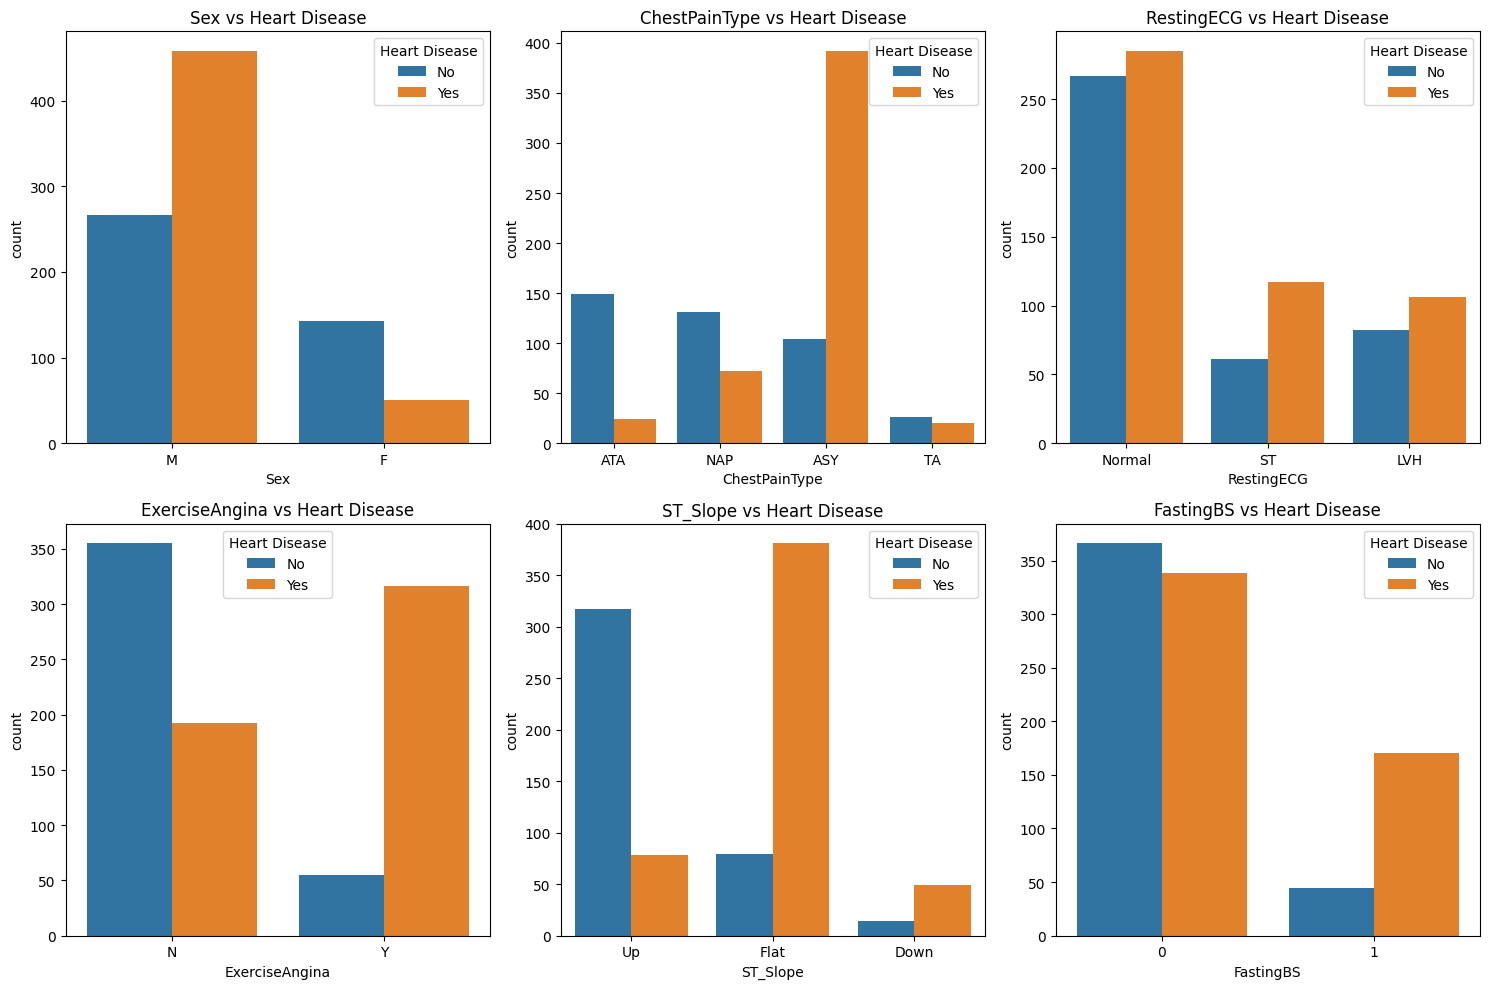

In [35]:
# Get all categorical variables (excluding the target variable)
categorical_vars = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS']

# Create subplots for all categorical variables
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, var in enumerate(categorical_vars):
    sns.countplot(x=df[var], hue=df['HeartDisease'], ax=axes[i])
    axes[i].set_title(f'{var} vs Heart Disease')
    axes[i].legend(title='Heart Disease', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

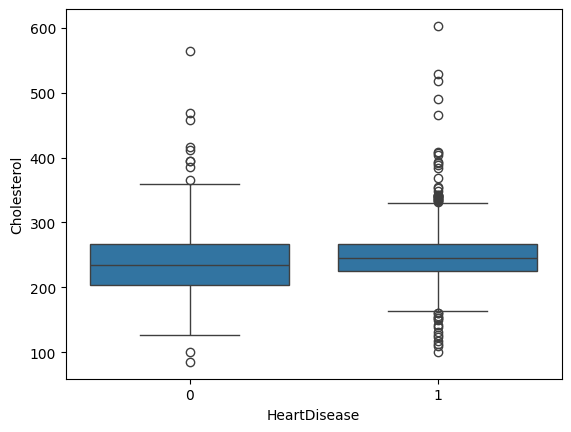

In [36]:
sns.boxplot(x = 'HeartDisease', y = 'Cholesterol',data = df)

<Axes: xlabel='HeartDisease', ylabel='Age'>

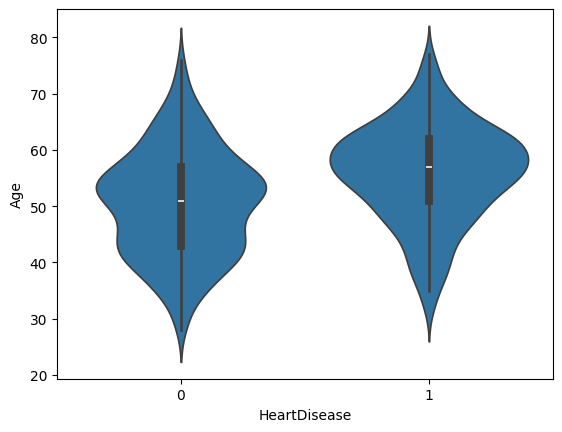

In [37]:
sns.violinplot(x='HeartDisease', y='Age', data=df)

<Axes: >

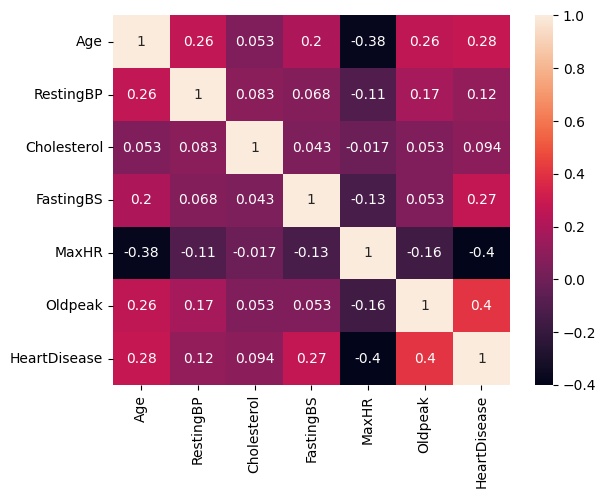

In [38]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [39]:

df_encode = pd.get_dummies(df,drop_first=True)

In [40]:
df_encode

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160.0,180.0,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130.0,283.0,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138.0,214.0,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150.0,195.0,0,122,0.0,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,0,132,1.2,1,True,False,False,True,True,False,False,True,False
914,68,144.0,193.0,1,141,3.4,1,True,False,False,False,True,False,False,True,False
915,57,130.0,131.0,0,115,1.2,1,True,False,False,False,True,False,True,True,False
916,57,130.0,236.0,0,174,0.0,1,False,True,False,False,False,False,False,True,False


In [41]:
df_encode = df_encode.astype(int)

In [42]:
df_encode

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0,1,0,1,0,0,0,0,0,1,0


In [43]:
df_encode.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

## Statistical Tests for Continuous Variables T-test

In [44]:
from scipy.stats import ttest_ind
import numpy as np

# CONTINUOUS VARIABLES
continuous_vars = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

print("="*60)
print("T-TESTS FOR CONTINUOUS VARIABLES")
print("="*60)

cont_results = []
for var in continuous_vars:
    # Split data into two groups
    no_disease = df_encode[df_encode['HeartDisease'] == 0][var]
    has_disease = df_encode[df_encode['HeartDisease'] == 1][var]

    # Perform t-test
    t_stat, p_value = ttest_ind(no_disease, has_disease)

    print(f"\n{var}:")
    print(f"  No Disease - Average: {no_disease.mean():.2f}")
    print(f"  Has Disease - Average: {has_disease.mean():.2f}")
    print(f"  T-statistic: {t_stat:.3f}")
    print(f"  P-value: {p_value:.4f}")

    if p_value < 0.05:
        print(f"  ✅ SIGNIFICANT - (Keep feature)")
        significant = "Yes"
    else:
        print(f"  ❌ Not significant - (Drop feature)")
        significant = "No"

    # Calculate Cohen's d (effect size)
    pooled_std = np.sqrt(((len(no_disease)-1)*no_disease.var() + (len(has_disease)-1)*has_disease.var()) / (len(no_disease)+len(has_disease)-2))
    cohens_d = abs(has_disease.mean() - no_disease.mean()) / pooled_std

    cont_results.append({
        'Variable': var,
        'Test': 'T-Test',
        'P_Value': p_value,
        'Effect_Size': cohens_d,
        'Significant': significant
    })

print(f"\n T-TEST SUMMARY:")
cont_df = pd.DataFrame(cont_results)
print(cont_df[['Variable', 'P_Value', 'Effect_Size', 'Significant']].round(4))

T-TESTS FOR CONTINUOUS VARIABLES

Age:
  No Disease - Average: 50.55
  Has Disease - Average: 55.90
  T-statistic: -8.897
  P-value: 0.0000
  ✅ SIGNIFICANT - (Keep feature)

RestingBP:
  No Disease - Average: 130.18
  Has Disease - Average: 134.44
  T-statistic: -3.594
  P-value: 0.0003
  ✅ SIGNIFICANT - (Keep feature)

Cholesterol:
  No Disease - Average: 239.02
  Has Disease - Average: 248.95
  T-statistic: -2.814
  P-value: 0.0050
  ✅ SIGNIFICANT - (Keep feature)

MaxHR:
  No Disease - Average: 148.15
  Has Disease - Average: 127.66
  T-statistic: 13.225
  P-value: 0.0000
  ✅ SIGNIFICANT - (Keep feature)

Oldpeak:
  No Disease - Average: 0.29
  Has Disease - Average: 1.07
  T-statistic: -12.911
  P-value: 0.0000
  ✅ SIGNIFICANT - (Keep feature)

 T-TEST SUMMARY:
      Variable  P_Value  Effect_Size Significant
0          Age   0.0000       0.5907         Yes
1    RestingBP   0.0003       0.2386         Yes
2  Cholesterol   0.0050       0.1868         Yes
3        MaxHR   0.0000     

## Chi-square Test for Categorical Variables

In [45]:
from scipy.stats import chi2_contingency

# Function to calculate Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# BINARY/CATEGORICAL VARIABLES
binary_vars = ['FastingBS', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
               'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
               'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up']

print("="*70)
print("CHI-SQUARE TESTS FOR BINARY/CATEGORICAL VARIABLES")
print("="*70)

binary_results = []
for var in binary_vars:
    # Create contingency table
    contingency_table = pd.crosstab(df_encode[var], df_encode['HeartDisease'])

    # Perform chi-square test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    # Calculate Cramer's V
    cramers = cramers_v(df_encode[var], df_encode['HeartDisease'])

    print(f"\n{var}:")
    print(f"  Chi-Square: {chi2:.3f}")
    print(f"  P-value: {p_value:.4f}")
    print(f"  Cramer's V: {cramers:.3f}")

    if p_value < 0.05:
        print(f"  ✅ SIGNIFICANT - (Keep feature)")
        significant = "Yes"
    else:
        print(f"  ❌ Not significant - (Drop feature)")
        significant = "No"

    # Interpret Cramer's V strength
    if cramers < 0.1:
        strength = "Very weak"
    elif cramers < 0.3:
        strength = "Weak to moderate"
    elif cramers < 0.5:
        strength = "Moderate to strong"
    else:
        strength = "Very strong"

    print(f"  Association strength: {strength}")

    binary_results.append({
        'Variable': var,
        'Test': 'Chi-Square',
        'P_Value': p_value,
        'Effect_Size': cramers,
        'Significant': significant
    })

print(f"\n CHI-SQUARE TEST SUMMARY:")
binary_df = pd.DataFrame(binary_results)
print(binary_df[['Variable', 'P_Value', 'Effect_Size', 'Significant']].round(4))

CHI-SQUARE TESTS FOR BINARY/CATEGORICAL VARIABLES

FastingBS:
  Chi-Square: 64.321
  P-value: 0.0000
  Cramer's V: 0.263
  ✅ SIGNIFICANT - (Keep feature)
  Association strength: Weak to moderate

Sex_M:
  Chi-Square: 84.145
  P-value: 0.0000
  Cramer's V: 0.301
  ✅ SIGNIFICANT - (Keep feature)
  Association strength: Moderate to strong

ChestPainType_ATA:
  Chi-Square: 146.236
  P-value: 0.0000
  Cramer's V: 0.398
  ✅ SIGNIFICANT - (Keep feature)
  Association strength: Moderate to strong

ChestPainType_NAP:
  Chi-Square: 40.609
  P-value: 0.0000
  Cramer's V: 0.208
  ✅ SIGNIFICANT - (Keep feature)
  Association strength: Weak to moderate

ChestPainType_TA:
  Chi-Square: 2.274
  P-value: 0.1316
  Cramer's V: 0.037
  ❌ Not significant - (Drop feature)
  Association strength: Very weak

RestingECG_Normal:
  Chi-Square: 7.328
  P-value: 0.0068
  Cramer's V: 0.083
  ✅ SIGNIFICANT - (Keep feature)
  Association strength: Very weak

RestingECG_ST:
  Chi-Square: 9.135
  P-value: 0.0025
  Cram

In [46]:
print(f"\n" + "="*80)
print("COMPLETE FEATURE SELECTION SUMMARY")
print("="*80)

all_results = cont_results + binary_results
summary_df = pd.DataFrame(all_results)
summary_df = summary_df.sort_values('P_Value')

print(f"\n{summary_df[['Variable', 'Test', 'P_Value', 'Effect_Size', 'Significant']].round(4)}")

# Final recommendations
keep_features = [result['Variable'] for result in all_results if result['Significant'] == 'Yes']
drop_features = [result['Variable'] for result in all_results if result['Significant'] == 'No']

print(f"\n FEATURES TO KEEP ({len(keep_features)} out of {len(all_results)}):")
for i, feature in enumerate(keep_features, 1):
    print(f"   {i:2d}.  {feature}")

if drop_features:
    print(f"\n FEATURES TO DROP ({len(drop_features)}):")
    for i, feature in enumerate(drop_features, 1):
        print(f"   {i:2d}.  {feature}")

print(f"\n FEATURE SELECTION SUMMARY:")
print(f"   • Total features tested: {len(all_results)}")
print(f"   • Significant features: {len(keep_features)}")
print(f"   • Non-significant features: {len(drop_features)}")
print(f"   • Selection efficiency: {(len(keep_features)/len(all_results)*100):.1f}%")

# Create final feature list for modeling
print(f"\n FINAL FEATURE LIST FOR MACHINE LEARNING:")
final_features = keep_features.copy()  # Don't include target in feature list
print(f"   Features: {final_features}")
print(f"   Target: HeartDisease")


COMPLETE FEATURE SELECTION SUMMARY

             Variable        Test  P_Value  Effect_Size Significant
14        ST_Slope_Up  Chi-Square   0.0000       0.6194         Yes
13      ST_Slope_Flat  Chi-Square   0.0000       0.5513         Yes
12   ExerciseAngina_Y  Chi-Square   0.0000       0.4912         Yes
3               MaxHR      T-Test   0.0000       0.8780         Yes
4             Oldpeak      T-Test   0.0000       0.8572         Yes
7   ChestPainType_ATA  Chi-Square   0.0000       0.3980         Yes
6               Sex_M  Chi-Square   0.0000       0.3011         Yes
0                 Age      T-Test   0.0000       0.5907         Yes
5           FastingBS  Chi-Square   0.0000       0.2628         Yes
8   ChestPainType_NAP  Chi-Square   0.0000       0.2078         Yes
1           RestingBP      T-Test   0.0003       0.2386         Yes
11      RestingECG_ST  Chi-Square   0.0025       0.0942         Yes
2         Cholesterol      T-Test   0.0050       0.1868         Yes
10  Resting

In [47]:
selected_features = final_features.copy()
selected_features.append('HeartDisease')

df_final = df_encode[selected_features].copy()
df_final.head()


,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,FastingBS,Sex_M,ChestPainType_ATA,ChestPainType_NAP,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140,289,172,0,0,1,1,0,1,0,0,0,1,0
1,49,160,180,156,1,0,0,0,1,1,0,0,1,0,1
2,37,130,283,98,0,0,1,1,0,0,1,0,0,1,0
3,48,138,214,108,1,0,0,0,0,1,0,1,1,0,1
4,54,150,195,122,0,0,1,0,1,1,0,0,0,1,0


## Standardize numerical columns

In [48]:
from sklearn.preprocessing import StandardScaler
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
scaler = StandardScaler()
df_final[numerical_cols] = scaler.fit_transform(df_final[numerical_cols])
df_final.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,FastingBS,Sex_M,ChestPainType_ATA,ChestPainType_NAP,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,-1.433140,0.414885,0.834754,1.382928,-0.727592,0,1,1,0,1,0,0,0,1,0
1,-0.478484,1.527224,-1.210675,0.754157,0.282891,0,0,0,1,1,0,0,1,0,1
2,-1.751359,-0.141284,0.722161,-1.525138,-0.727592,0,1,1,0,0,1,0,0,1,0
3,-0.584556,0.303651,-0.572651,-1.132156,0.282891,0,0,0,0,1,0,1,1,0,1
4,0.051881,0.971054,-0.929194,-0.581981,-0.727592,0,1,0,1,1,0,0,0,1,0


# Train Test split

In [49]:
X, y = df_final.drop('HeartDisease', axis=1), df_final['HeartDisease']

In [50]:
X.shape, y.shape

((918, 14), (918,))

In [51]:
# Train Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model building

In [52]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [54]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM (RBF Kernel)": SVC(kernel='rbf')
}
results = []

In [55]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'F1 Score': f1
    })

In [57]:
results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,F1 Score
0,Logistic Regression,0.847826,0.865385
1,KNN,0.847826,0.865385
2,Naive Bayes,0.836957,0.854369
3,Decision Tree,0.771739,0.794118
4,SVM (RBF Kernel),0.842391,0.863850


# Save pickle file for deployment

In [58]:
import joblib
joblib.dump(models['KNN'],'KNN_heart.pkl')
joblib.dump(scaler,'scaler.pkl')
joblib.dump(X.columns.tolist(),'columns.pkl')

['columns.pkl']